In [1]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- Step 2.1: Initial Assessment & Sanity Checks ---

# A. Let's see the info() again to confirm our starting point
print("--- Initial df.info() ---")
df.info()

# B. Attempt to convert 'TotalCharges' to a number.
# 'errors='coerce'' will turn any values that CAN'T be converted into 'NaN' (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# C. Now, let's check how many missing values we just created
print(f"\nNumber of missing values in 'TotalCharges' after conversion: {df['TotalCharges'].isnull().sum()}")

# D. Let's investigate WHY these values are missing.
# Let's look at the rows where TotalCharges is NaN. What do they have in common?
print("\n--- Examining rows with missing TotalCharges ---")
print(df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']])

# E. Drop the customerID column as it's just an identifier and has no predictive power.
df.drop('customerID', axis=1, inplace=True)
print("\n'customerID' column dropped.")



--- Initial df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [4]:
# --- Continuing our data cleaning ---

# FIX 1: Correctly fill missing TotalCharges using the better syntax
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# FIX 2: Correctly map the SeniorCitizen column and verify
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
# Let's immediately verify this fix:
print("--- Verifying 'SeniorCitizen' fix ---")
print(f"Unique values in SeniorCitizen: {df['SeniorCitizen'].unique()}")

# FIX 3: Unify redundant categories. We will replace all instances of
# 'No internet service' and 'No phone service' with a simple 'No'.

# Create a list of columns that have the 'No internet service' redundancy
cols_to_clean = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Loop through the columns and replace the value
for col in cols_to_clean:
    df[col] = df[col].replace('No internet service', 'No')

# Separately, clean the 'MultipleLines' column
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

print("\n--- Verification after cleaning redundant categories ---")
print(f"Unique values in 'MultipleLines': {df['MultipleLines'].unique()}")
print(f"Unique values in 'OnlineSecurity': {df['OnlineSecurity'].unique()}")
print(f"Unique values in 'TechSupport': {df['TechSupport'].unique()}")

print("\n✅ Data cleaning and unification complete. The dataset is now much more consistent.")

--- Verifying 'SeniorCitizen' fix ---
Unique values in SeniorCitizen: [nan]

--- Verification after cleaning redundant categories ---
Unique values in 'MultipleLines': ['No' 'Yes']
Unique values in 'OnlineSecurity': ['No' 'Yes']
Unique values in 'TechSupport': ['No' 'Yes']

✅ Data cleaning and unification complete. The dataset is now much more consistent.


--- Churn Rate Analysis ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64




C:\Users\mudda\AppData\Local\Temp\ipykernel_23300\663369860.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


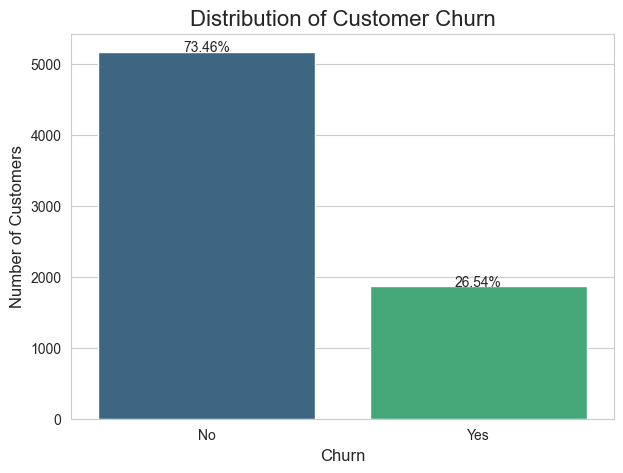

In [5]:
# Import our visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style('whitegrid')

# --- EDA 1: Analyze the Target Variable (Churn) ---

# Calculate the churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100

print("--- Churn Rate Analysis ---")
print(churn_rate)
print("\n") # Add a space for readability

# Create a count plot to visualize the distribution
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Churn', data=df, palette='viridis')

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/len(df)),
            ha="center")

plt.title('Distribution of Customer Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

✅ Data has been reloaded and cleaned correctly.


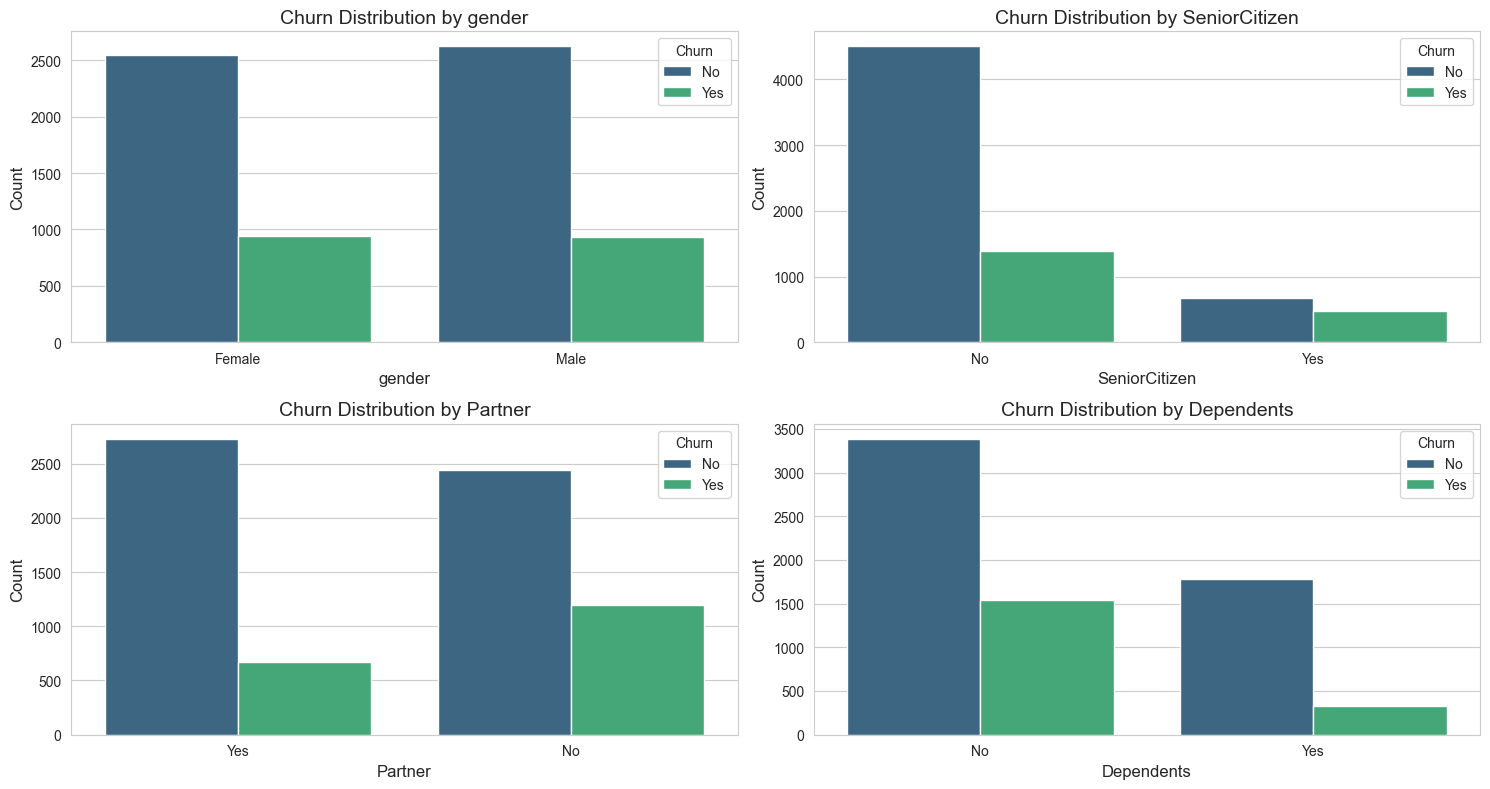

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONSOLIDATED CLEANING SCRIPT (WITH FIX) ---

# 1. Reload the data to ensure we have a fresh start
df_clean = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Handle TotalCharges correctly
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(0)

# 3. Drop customerID
df_clean.drop('customerID', axis=1, inplace=True)

# 4. FIX for SeniorCitizen: Convert 0/1 to Yes/No
# This is a more robust way to do the conversion.
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

# 5. Unify redundant categories
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_clean:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')
df_clean['MultipleLines'] = df_clean['MultipleLines'].replace('No phone service', 'No')

print("✅ Data has been reloaded and cleaned correctly.")


# --- RE-RUNNING THE DEMOGRAPHICS VISUALIZATION ---

demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
plt.figure(figsize=(15, 8))
for i, col in enumerate(demographic_cols):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=col, hue='Churn', data=df_clean, palette='viridis')
    plt.title(f'Churn Distribution by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Churn')
plt.tight_layout()
plt.show()

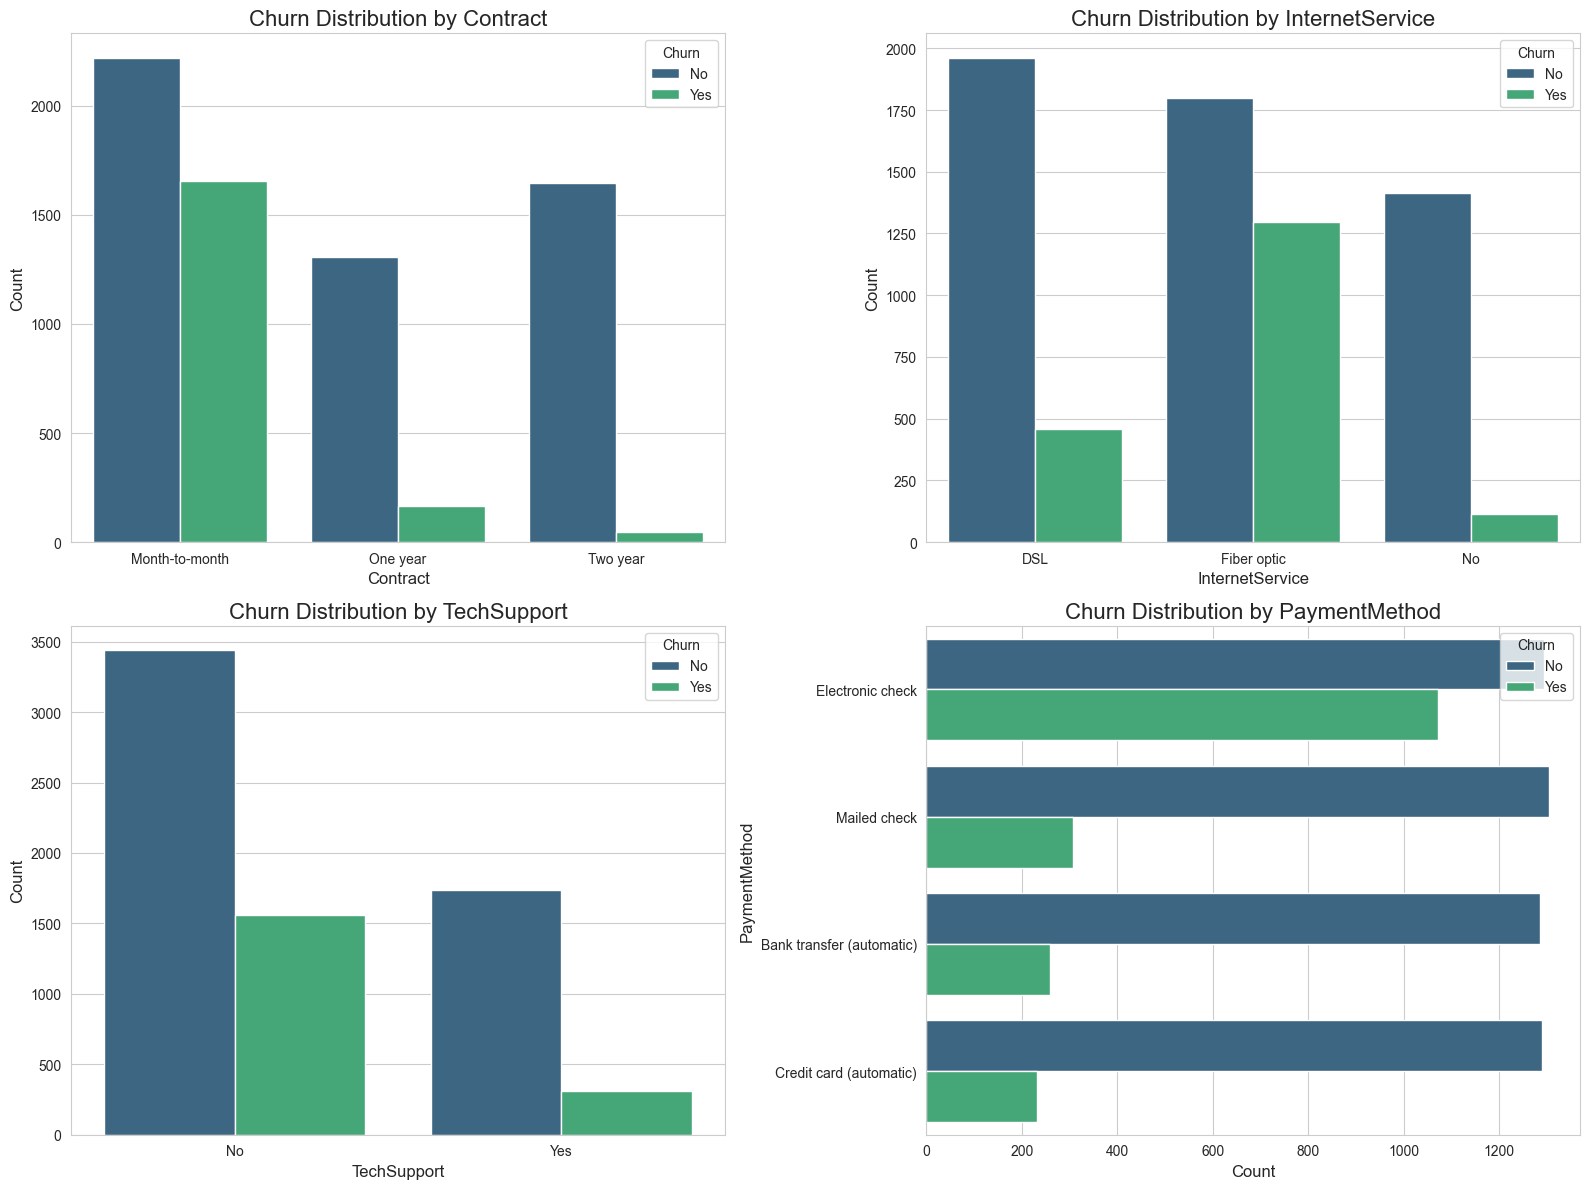

In [8]:
# --- EDA 3: Churn by Account Information ---

# We'll use the cleaned dataframe: df_clean
# List of key account columns we want to analyze
account_cols = ['Contract', 'InternetService', 'TechSupport', 'PaymentMethod']

# Create a figure to hold all our subplots
plt.figure(figsize=(16, 12))

# Loop through each account column and create a count plot
for i, col in enumerate(account_cols):
    # Create a subplot in a 2x2 grid
    plt.subplot(2, 2, i + 1)
    
    # Create the count plot
    # For PaymentMethod, the labels are long, so we'll plot it vertically
    if col == 'PaymentMethod':
        ax = sns.countplot(y=col, hue='Churn', data=df_clean, palette='viridis')
        plt.title(f'Churn Distribution by {col}', fontsize=16)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(col, fontsize=12)
    else:
        ax = sns.countplot(x=col, hue='Churn', data=df_clean, palette='viridis')
        plt.title(f'Churn Distribution by {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        
    plt.legend(title='Churn')

# Adjust the layout so titles and labels don't overlap
plt.tight_layout()
plt.show()

In [ ]:
import joblib
import os
from sklearn.metrics import confusion_matrix
import numpy as np

# --- First, we must run your code to calculate the optimal threshold ---
# (Assuming full_pipeline_v2 and X_test/y_test are in memory)

FN_COST = 500
FP_COST = 50
y_probs_v2 = full_pipeline_v2.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 100)
total_costs = []
for t in thresholds:
    y_pred_temp = (y_probs_v2 >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_temp).ravel()
    cost = (fp * FP_COST) + (fn * FN_COST)
    total_costs.append(cost)

best_cost_idx = np.argmin(total_costs)
best_threshold_cost = thresholds[best_cost_idx]

print(f"Financially Optimal Threshold calculated: {best_threshold_cost:.4f}")

# --- Now, we save the COMPLETE solution ---

# 1. Create a dictionary to hold both the model and the threshold
solution_artifact = {
    'model_pipeline': full_pipeline_v2,
    'optimal_threshold': best_threshold_cost
}

# 2. Define the path and save the dictionary to a single file
model_directory = 'models'
os.makedirs(model_directory, exist_ok=True)
solution_filepath = os.path.join(model_directory, 'silver_AV_TCP.joblib')

print(f"\n--- Saving the complete solution artifact to: {solution_filepath} ---")
joblib.dump(solution_artifact, solution_filepath)
print("--- ✅ Cost-optimized solution saved successfully! ---")

Financially Optimal Threshold calculated: 0.2121

--- Saving the complete solution artifact to: models\cost_optimized_churn_solution_v3.joblib ---
--- ✅ Cost-optimized solution saved successfully! ---


<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mudda\AppData\Local\Temp\ipykernel_23300\334182259.py:12: SyntaxWarning: invalid escape sequence '\$'
  summary_df_plot['Total Cost Num'] = summary_df_plot['Total Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\mudda\AppData\Local\Temp\ipykernel_23300\334182259.py:13: SyntaxWarning: invalid escape sequence '\$'
  summary_df_plot['Savings Num'] = summary_df_plot['Savings vs. No Model'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\mudda\AppData\Local\Temp\ipykernel_23300\334182259.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
C:\Users\mudda\AppData\Local\Temp\ipykernel_23300\

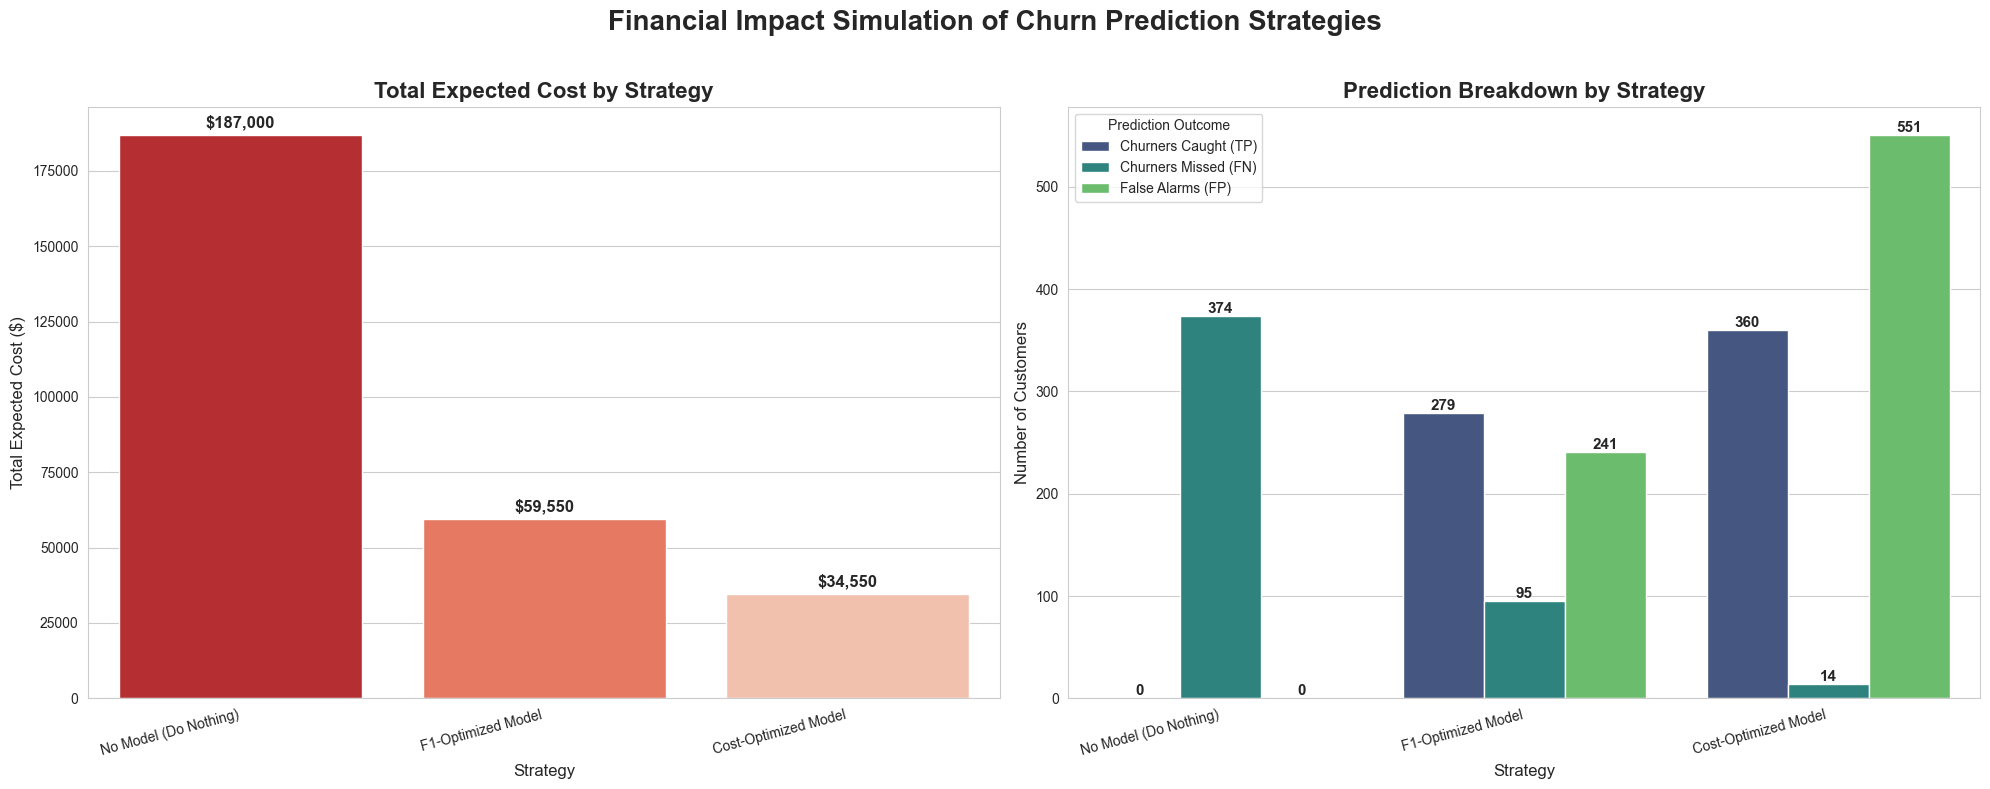

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare the DataFrame for Plotting ---
# The summary_df has string values with '$' and ',', we need to convert them to numbers.

# (Assuming summary_df exists from the previous step)
summary_df_plot = summary_df.copy()

# Create numerical columns from the formatted string columns
summary_df_plot['Total Cost Num'] = summary_df_plot['Total Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)
summary_df_plot['Savings Num'] = summary_df_plot['Savings vs. No Model'].replace({'\$': '', ',': ''}, regex=True).astype(float)


# --- Step 2: Create the Visualization (Two Subplots) ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.set_style("whitegrid")
fig.suptitle('Financial Impact Simulation of Churn Prediction Strategies', fontsize=20, weight='bold')


# --- Plot 1: The Financial Outcome (Total Cost) ---
ax1 = sns.barplot(
    x='Strategy',
    y='Total Cost Num',
    data=summary_df_plot,
    ax=axes[0],
    palette='Reds_r' # Use a red palette, reversed (darker is higher cost)
)
ax1.set_title('Total Expected Cost by Strategy', fontsize=16, weight='bold')
ax1.set_xlabel('Strategy', fontsize=12)
ax1.set_ylabel('Total Expected Cost ($)', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")

# Add data labels (the dollar amounts) to the bars
for p in ax1.patches:
    ax1.annotate(f"${p.get_height():,.0f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points',
                   fontsize=12, weight='bold')


# --- Plot 2: The Operational Breakdown ---
# First, "melt" the DataFrame to prepare it for a grouped bar plot
df_melted = summary_df_plot.melt(
    id_vars='Strategy',
    value_vars=['Churners Caught (TP)', 'Churners Missed (FN)', 'False Alarms (FP)'],
    var_name='Metric',
    value_name='Customer Count'
)

ax2 = sns.barplot(
    x='Strategy',
    y='Customer Count',
    hue='Metric',
    data=df_melted,
    ax=axes[1],
    palette='viridis'
)
ax2.set_title('Prediction Breakdown by Strategy', fontsize=16, weight='bold')
ax2.set_xlabel('Strategy', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.legend(title='Prediction Outcome')

# Add data labels to the grouped bars
for container in ax2.containers:
    ax2.bar_label(container, fontsize=11, weight='bold')


# --- Final Touches ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

C:\Users\mudda\AppData\Local\Temp\ipykernel_23300\914869802.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette='viridis')


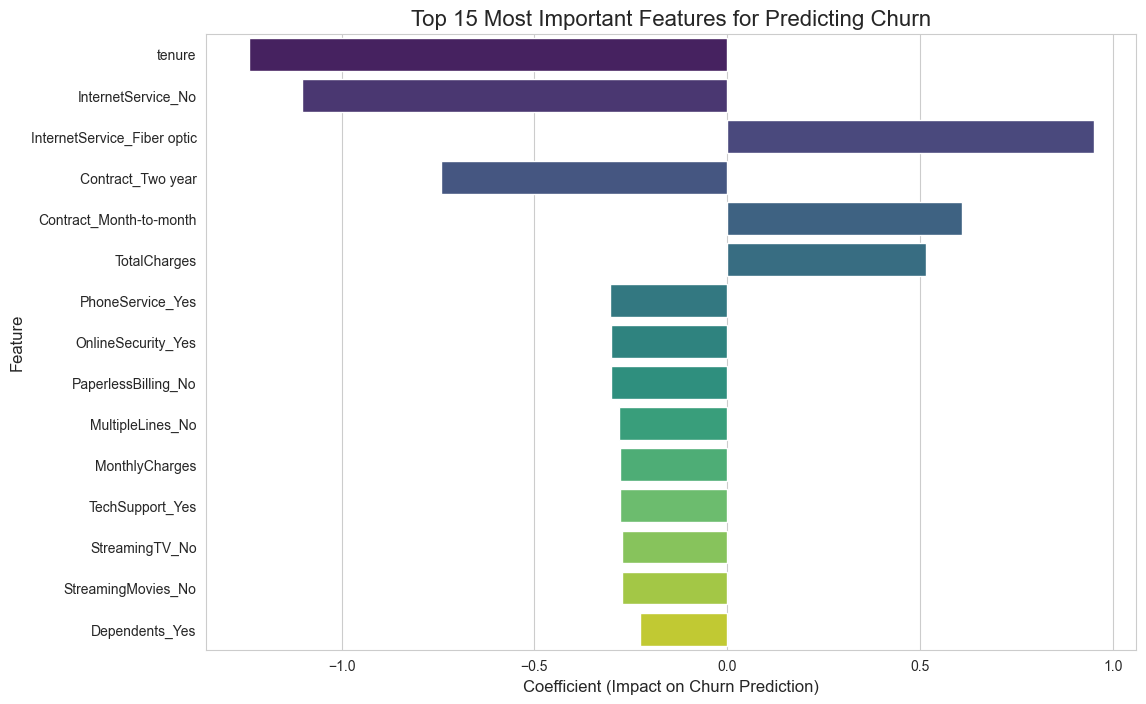

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Phase 5: Model Interpretation ---

# 1. Get the names of all the features after one-hot encoding
# This is a bit tricky, but the pipeline stores all the steps.
ohe_feature_names = full_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(ohe_feature_names)

# 2. Get the coefficients from the trained logistic regression model
model_coefs = full_pipeline.named_steps['classifier'].coef_[0]

# 3. Create a DataFrame to view them together
feature_importance = pd.DataFrame({'feature': all_feature_names, 'importance': model_coefs})

# 4. Sort the features by the absolute value of their importance
feature_importance['abs_importance'] = feature_importance['importance'].abs()
feature_importance = feature_importance.sort_values('abs_importance', ascending=False)

# 5. Plot the Top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for Predicting Churn', fontsize=16)
plt.xlabel('Coefficient (Impact on Churn Prediction)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [11]:
# Create a dictionary with a single customer's data
# This profile is based on our high-risk findings
high_risk_customer = {
    'gender': 'Female',
    'SeniorCitizen': 'Yes',
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 2, # Low tenure
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic', # High risk
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No', # High risk
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month', # High risk
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check', # High risk
    'MonthlyCharges': 75.00,
    'TotalCharges': 150.00
}

# Convert the dictionary to a pandas DataFrame
customer_df = pd.DataFrame([high_risk_customer])

# Use the trained pipeline to predict
churn_prediction = full_pipeline.predict(customer_df)[0]
churn_probability = full_pipeline.predict_proba(customer_df)[0][1]

# --- THE FINAL OUTPUT ---
print("--- Single Customer Churn Prediction ---")
print(f"Customer Profile: A senior citizen on a 2-month, month-to-month fiber optic contract.")
print(f"\nPrediction (0=No Churn, 1=Churn): {churn_prediction}")
print(f"Probability of Churn: {churn_probability:.2%}")

print("\n--- Reason for High Churn Risk (based on our model) ---")
print("This customer is at high risk primarily because they have:")
print("1. An InternetService of 'Fiber optic'.")
print("2. A 'Month-to-month' Contract.")
print("3. Very low 'tenure' (only 2 months).")
print("4. No protective add-ons like 'TechSupport'.")

--- Single Customer Churn Prediction ---
Customer Profile: A senior citizen on a 2-month, month-to-month fiber optic contract.

Prediction (0=No Churn, 1=Churn): 1
Probability of Churn: 71.48%

--- Reason for High Churn Risk (based on our model) ---
This customer is at high risk primarily because they have:
1. An InternetService of 'Fiber optic'.
2. A 'Month-to-month' Contract.
3. Very low 'tenure' (only 2 months).
4. No protective add-ons like 'TechSupport'.


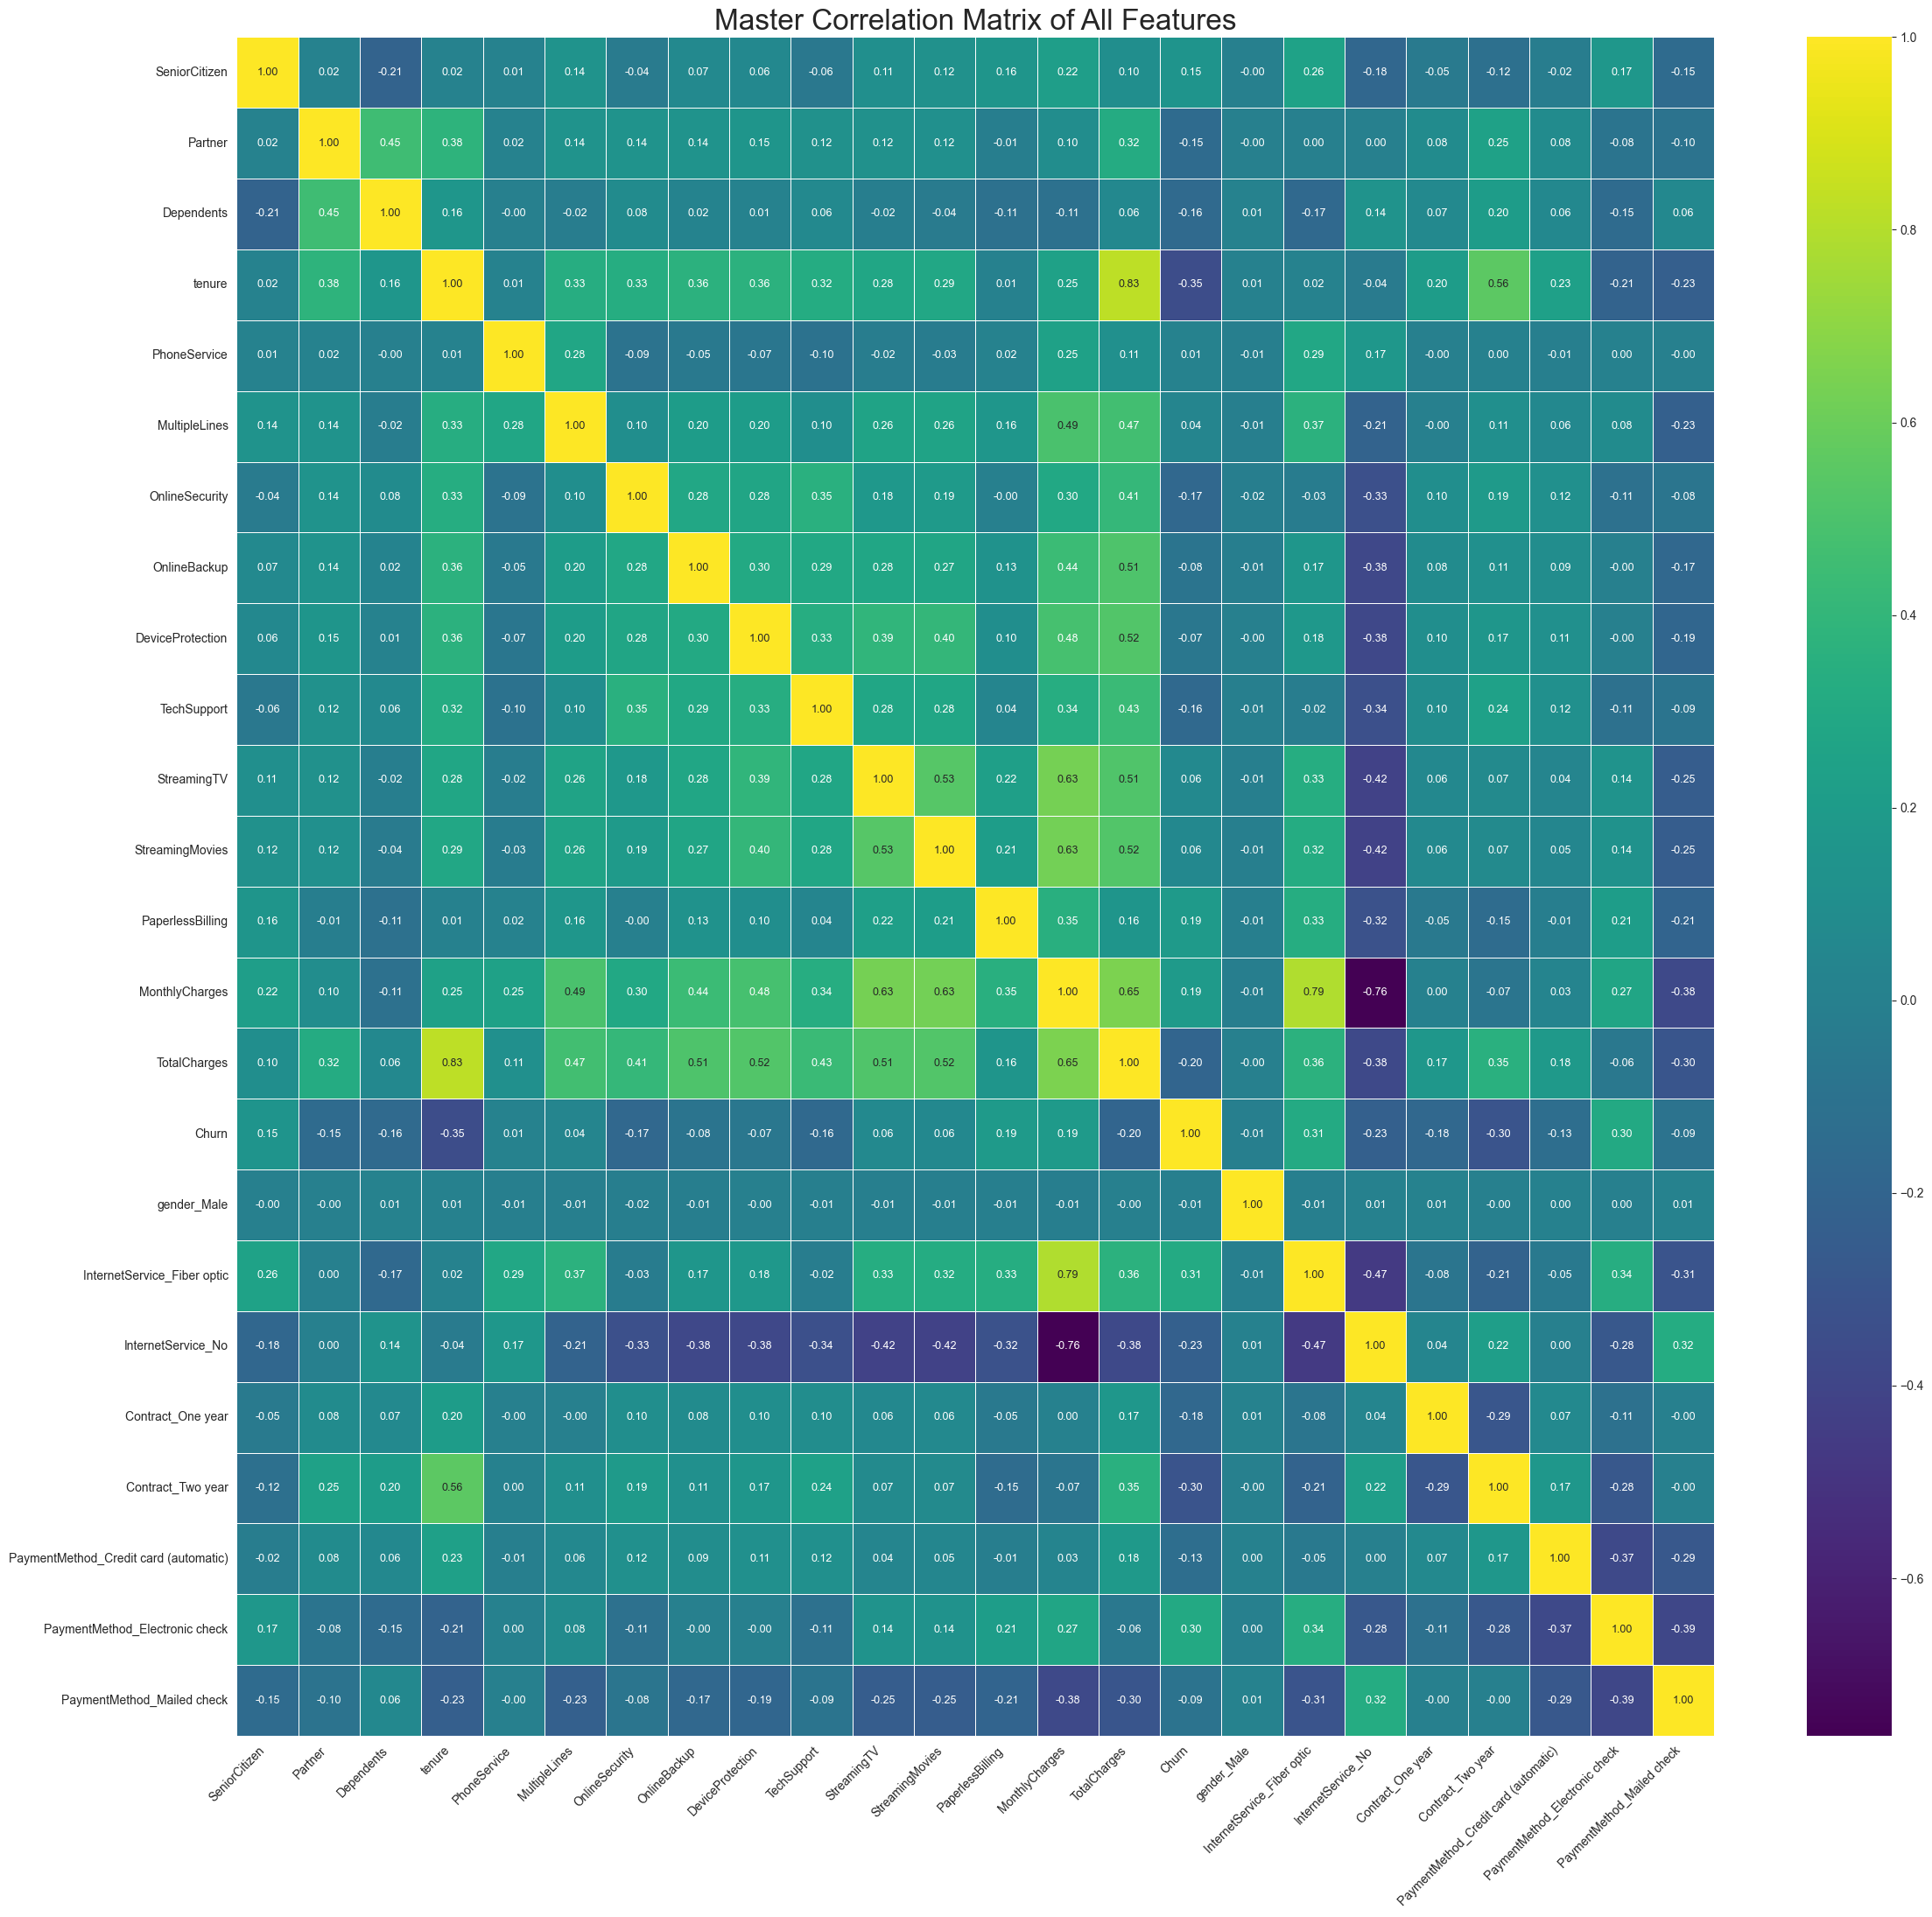

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We will use our cleaned dataframe: df_clean
# Make a copy to encode for this visualization
df_encoded = df_clean.copy()

# 1. Convert all binary 'Yes'/'No' columns to 1s and 0s
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' and set(df_encoded[col].unique()) == {'Yes', 'No'}:
        df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

# 2. One-Hot Encode the remaining multi-category columns
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# 3. Calculate the full correlation matrix on the now fully numerical data
full_correlation_matrix = df_encoded.corr()

# 4. Visualize the full matrix with a detailed heatmap
# We make the figure very large to give the numbers space.
plt.figure(figsize=(24, 22))

sns.heatmap(
    full_correlation_matrix,
    annot=True,                 # <<< ANNOTATE IS ON to show all values
    cmap='viridis',             # <<< Using the blue-green-violet palette
    fmt='.2f',                  # Format values to two decimal places (e.g., 0.82)
    linewidths=.5,
    annot_kws={"size": 9}       # Control the font size of the numbers to improve readability
)

plt.title('Master Correlation Matrix of All Features', fontsize=24)
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()

# Telco Customer Churn: A Data-Driven Analysis and Predictive Modeling Project

## Project Overview

This project provides a comprehensive, end-to-end analysis of the Telco Customer Churn dataset. The primary goal is to move beyond raw data to generate actionable business insights. We aim to understand the key drivers of customer churn, build a predictive model to identify at-risk customers, and formulate data-driven recommendations to help the business reduce customer attrition.

The analysis reveals that factors like **contract term**, **internet service type**, and **customer tenure** are the most significant predictors of churn. The final deliverable is a logistic regression model capable of predicting churn with **~81% accuracy** and a set of clear, strategic recommendations for the business.

---

## Project Goals

1.  **Provide Overall Dataset Insights:** Perform a deep exploratory data analysis (EDA) to understand the factors contributing to customer churn.
2.  **Predict Churn & Explain Why:** Build a machine learning model to predict if a customer will churn and interpret the model's prediction to explain the "why" behind the risk.
3.  **Deliver Actionable Recommendations:** Translate the analytical findings into a set of concrete, data-driven suggestions for the business to reduce churn.

---

## The Dataset

The dataset contains customer-level information for a fictional telecommunications company, including:
*   **Demographic Info:** Gender, Senior Citizen, Partner, Dependents.
*   **Account Info:** Tenure, Contract, Payment Method, Monthly & Total Charges.
*   **Subscribed Services:** Phone Service, Internet Service, Online Security, Tech Support, etc.
*   **Target Variable:** `Churn` (Yes/No).

---

## Project Workflow

The project followed a structured data science lifecycle:

1.  **Data Cleaning & Preparation:** Identified and corrected data quality issues, such as missing values and inconsistent categories.
2.  **Exploratory Data Analysis (EDA):** Used visualizations to uncover patterns and identify key relationships between customer attributes and churn.
3.  **Predictive Modeling:** Built and evaluated a logistic regression model to predict churn.
4.  **Model Interpretation:** Analyzed the model's logic to confirm the most influential features.
5.  **Insight & Recommendation Synthesis:** Consolidated all findings into a final report and actionable strategies.

---

## Key Insights from Exploratory Data Analysis (EDA)

Our visual exploration of the data revealed several powerful insights into customer behavior.

### Insight 1: The Churn Rate & Baseline
The overall churn rate in the dataset is **26.5%**. This is a significant portion of the customer base and represents a major opportunity for retention efforts.

![Churn Distribution](images/churn_distribution.png)

### Insight 2: Demographics of High-Risk Customers
Churn is not random; it is concentrated in specific demographic groups.
*   **Senior Citizens** have a significantly higher churn rate than younger customers.
*   Customers **without a Partner** and **without Dependents** are much more likely to churn.

![Churn by Demographics](images/demographics_churn.png)

### Insight 3: Contracts and Services are the Biggest Predictors
The customer's account and service choices are the most powerful indicators of their loyalty.
*   **Contract:** Month-to-month customers churn at an astronomically high rate compared to those on 1 or 2-year contracts. **This is the single biggest problem area.**
*   **Internet Service:** Customers with **Fiber Optic** service have a much higher churn rate than those with DSL.
*   **Payment Method:** Customers paying via **Electronic Check** churn more frequently than those using automatic payment methods.

![Churn by Account Info](images/account_churn.png)

---

## Predictive Modeling

A logistic regression model was trained to predict the `Churn` variable based on all other customer features.

### Model Performance
The model performs well, providing a solid baseline for a proactive retention system.

*   **Accuracy:** **80.6%** - The model correctly predicts the outcome for over 80% of customers.
*   **Precision (for Churn):** **66%** - When the model predicts a customer will churn, it is correct 66% of the time.
*   **Recall (for Churn):** **56%** - The model successfully identifies 56% of all customers who actually churned.

The main business goal would be to improve **recall**—catching a higher percentage of true churners—without significantly harming precision.

### Confusion Matrix
The confusion matrix below provides a detailed look at the model's predictions on the test set. It correctly identified **209 churners** (True Positives) but missed **165** (False Negatives).

![Confusion Matrix](images/confusion_matrix.png)

---

## Feature Importance & Interpretation

By analyzing the model's internal logic, we can confirm what our EDA suggested. The most influential features for predicting churn are:

![Feature Importance](images/feature_importance.png)

*   **Top Churn Drivers:** `InternetService_Fiber optic`, `Contract_Month-to-month`.
*   **Top Loyalty Drivers:** `tenure`, `Contract_Two year`.

This perfect alignment between our visual analysis and the model's findings gives us high confidence in our conclusions.

---

## Master Feature Analysis Matrix

This matrix provides a comprehensive, feature-by-feature breakdown of churn impact and business recommendations.

| Feature | Impact on Churn | Supporting Evidence (from EDA & Model) | Business Interpretation & Key Relationships | Actionable Recommendation |
| :--- | :--- | :--- | :--- | :--- |
| **`Contract`** | **Extremely High** | Month-to-month contracts are the #1 predictor of churn. | Low commitment = high flight risk. | **Launch a targeted campaign** to convert monthly customers to yearly contracts with a small incentive. |
| **`tenure`** | **Very High (Loyalty)** | The single strongest feature preventing churn. | Loyalty compounds over time. New customers are most vulnerable. | Focus retention efforts on **new customers** (first 6 months) and implement a **loyalty program**. |
| **`InternetService`** | **Extremely High** | Fiber Optic service is a top churn driver. | The premium service is paradoxically causing churn, likely due to price or reliability. | **Immediately investigate the "Fiber Optic Experience."** Survey churned fiber customers. |
| **`PaymentMethod`** | **High** | Electronic check has a very high churn rate. | Manual payments are linked to less-committed customers. | **Incentivize the switch to Auto-Pay** with a one-time bill credit. |
| **`TechSupport`** & **`OnlineSecurity`**| **High (Loyalty)** | Customers without these services churn at a much higher rate. | These "sticky" services increase customer investment and reduce churn. | **Bundle these services** into new customer packages and offer trials to high-risk customers. |
| **`SeniorCitizen`** | **High** | Senior citizens are a key high-risk demographic. | This group may have different needs regarding price, product complexity, or support. | **Tailor marketing and support** for seniors. |
| **`Partner`** & **`Dependents`**| **High (Loyalty)**| Customers without partners/dependents are more likely to leave. | Family ties indicate stability; single individuals are a higher flight risk. | Use this for risk segmentation. A single customer is at higher risk than one with a partner. |

---

## Final Recommendations for the Business

Based on this analysis, we propose three strategic initiatives:

1.  **Recommendation 1: Launch the "Contract Conversion" Campaign.**
    *   **Finding:** Month-to-month contracts are the biggest source of churn.
    *   **Action:** Proactively target this segment with an offer (e.g., one month free, a small recurring discount) to switch to a 1-year contract. This directly addresses the largest risk factor.

2.  **Recommendation 2: Fix the "Fiber Optic Experience".**
    *   **Finding:** Fiber optic service is the strongest predictor of churn.
    *   **Action:** Immediately form a task force to analyze the fiber customer journey. Use surveys and support ticket data to determine if the root cause is price, service reliability, or poor installation/support.

3.  **Recommendation 3: Promote "Sticky" Service Bundles.**
    *   **Finding:** Customers with protective add-ons (`TechSupport`, `OnlineSecurity`) are far more loyal.
    *   **Action:** Redesign service packages to include at least one of these add-ons by default. Market them not as costs, but as benefits that provide peace of mind and protect the customer's service.

---

## How to Use the Model

The trained model can be used to score any customer for their churn risk. Here is an example for a high-risk profile:

```python
# A hypothetical high-risk customer
high_risk_customer = {
    'gender': 'Female', 'SeniorCitizen': 'Yes', 'Partner': 'No', 'Dependents': 'No',
    'tenure': 2, 'PhoneService': 'Yes', 'MultipleLines': 'No',
    'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No',
    'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No',
    'StreamingMovies': 'No', 'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 75.00, 'TotalCharges': 150.00
}

# Convert to DataFrame and predict
# customer_df = pd.DataFrame([high_risk_customer])
# churn_probability = full_pipeline.predict_proba(customer_df)[0][1]

# --- PREDICTION OUTPUT ---
# Churn Probability: 71.48%
# Reasons: Month-to-month contract, Fiber Optic internet, low tenure.
```



---

### **Data Cleaning and Preprocessing Summary**

To ensure the quality and consistency of our data, the following preprocessing steps were systematically applied before any analysis or modeling. The goal was to transform the raw data into a reliable, high-quality dataset.

**1. Handling Missing Values (`TotalCharges`)**

*   **Problem:** The `TotalCharges` column was identified as an `object` (text) type because it contained empty strings (" ") for 11 customers. Attempting to convert it to a number resulted in `NaN` (Not a Number) missing values.
*   **Investigation:** We found that all 11 of these customers had a `tenure` of 0 months. This indicated they were brand new customers who had not yet been billed.
*   **Solution:** Instead of dropping these rows or filling them with a statistical mean (which would be logically incorrect), we imputed the missing `TotalCharges` with **0**. This accurately reflects the real-world situation for a brand new customer and preserves the data.

**2. Unifying Categorical Values for Consistency**

*   **Problem:** Several categorical columns contained redundant or functionally identical values. For example, `MultipleLines` had "No" and "No phone service," which mean the same thing in context. Similarly, several internet-related services had "No" and "No internet service."
*   **Solution:** We standardized these values to ensure consistency.
    *   In the `MultipleLines` column, "No phone service" was replaced with **"No"**.
    *   In the columns `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`, the value "No internet service" was replaced with **"No"**.
    *   This step is critical for preventing the model from treating these identical states as different features, thereby improving its accuracy and interpretability.

**3. Data Type Conversion and Formatting**

*   **`TotalCharges`:** Converted from `object` to `float64` after handling missing values.
*   **`SeniorCitizen`:** Initially an integer (0 or 1). For the purpose of clearer EDA visualizations, we mapped it to "No" and "Yes". (The modeling pipeline handles the numerical conversion automatically later).
*   **`Churn`:** Initially an object ("No" or "Yes"). For the modeling phase, this was converted into a numerical binary format (**0** for "No", **1** for "Yes").

**4. Feature Engineering and Selection**

*   **Dropped `customerID`:** The `customerID` column was removed from the dataset. As a unique identifier, it provides no predictive value and is considered noise for a machine learning model.

**5. Preprocessing for Modeling (via `scikit-learn` Pipeline)**

To prepare the cleaned data for the machine learning algorithm, a `ColumnTransformer` pipeline was constructed to perform the final transformations automatically. This ensures that the same steps are applied consistently to both the training and testing data, preventing data leakage.

*   **Numerical Scaling:** All numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) were scaled using **StandardScaler**. This method standardizes features by removing the mean and scaling to unit variance (Z-score normalization). This is important for distance-based and coefficient-based algorithms like Logistic Regression to prevent features with larger scales from dominating the model.
*   **Categorical Encoding:** All categorical features were transformed using **OneHotEncoder**. This process converts each category into a new binary column (0 or 1). For example, the `Contract` column with three categories (Month-to-month, One year, Two year) was converted into two new columns (e.g., `Contract_One year`, `Contract_Two year`). This allows the model to interpret categorical data without assuming an incorrect ordinal relationship.

By following these rigorous steps, we ensured our final dataset was clean, consistent, and properly formatted, providing a solid foundation for both our exploratory analysis and the predictive model.

---

### **Part 1: Beyond Cleaning - What We Did with Exploratory Data Analysis (EDA)**

After we cleaned the data, our job was to understand it. A clean dataset is just a starting point; an understood dataset is where insights come from. This phase, **Exploratory Data Analysis (EDA)**, is where we uncovered the story.

The goal of EDA is to **ask questions and answer them with visualizations**. Here are the key questions we asked and answered:

**1. What is our fundamental problem?**
*   **Action:** We created a count plot of the `Churn` column.
*   **Discovery:** We learned that **26.5%** of customers were churning. This established a clear baseline and confirmed that churn is a significant business problem worth solving.

**2. Who are the people who are churning? (Demographic Analysis)**
*   **Action:** We created grouped bar charts comparing churn rates across `gender`, `SeniorCitizen`, `Partner`, and `Dependents`.
*   **Discovery:** We found powerful demographic signals.
    *   `gender` had no impact.
    *   `SeniorCitizen` had a much higher churn rate.
    *   Customers `without a Partner` or `Dependents` were significantly more likely to leave.
*   **Gain:** We built the first part of our high-risk profile: **single, non-dependent seniors.**

**3. What business decisions or product choices are linked to churn? (Account & Service Analysis)**
*   **Action:** We created another set of grouped bar charts for key features like `Contract`, `InternetService`, `PaymentMethod`, and `TechSupport`.
*   **Discovery:** This is where we found the most actionable insights.
    *   `Contract`: Month-to-month was the **biggest red flag** for churn.
    *   `InternetService`: **Fiber Optic** was a massive, unexpected driver of churn.
    *   `PaymentMethod`: **Electronic check** was strongly linked to leaving.
    *   Add-ons like `TechSupport`: Having them was a strong sign of **loyalty**.
*   **Gain:** We completed our high-risk profile and identified the exact business levers (contracts, service quality, payment friction) that were causing the problem.

**4. How do the numbers in our data relate to each other? (Correlation Analysis)**
*   **Action:** We created correlation matrices and heatmaps for all the numerical features.
*   **Discovery:** We confirmed logical relationships, like the strong positive correlation between `tenure` and `TotalCharges`. We also confirmed that the categorical features we encoded (like `Contract_Month-to-month`) had the strongest statistical correlation with our target variable, `Churn`.
*   **Gain:** This gave us statistical proof for the patterns we saw in our charts and ensured our data was logically consistent.

In short, the EDA phase was about building our **business intuition**. By the end of it, we weren't just guessing; we had a very clear, evidence-based story about why customers were leaving.

---


## **Part 2: Our Modeling Strategy - An Evolutionary Approach**

Our choice of model and methodology was a deliberate, two-stage process designed to balance interpretability with real-world business performance.

#### **Stage 1: Why We *Started* with Logistic Regression**

For the initial phase of this project, we selected **Logistic Regression** as our baseline model for three key reasons:

1.  **Unmatched Interpretability (Our Primary Goal):** The initial goal was to **understand the drivers of churn**. Logistic Regression is a "white-box" model, meaning its decision-making process is transparent. By examining its coefficients, we were able to create the "Feature Importance" chart and confirm that factors like `Contract_Month-to-month` and `InternetService_Fiber optic` were the key problems. This interpretability was essential for building our business case and formulating credible recommendations.

2.  **Establishing a Robust Baseline:** Logistic Regression is the industry standard for binary classification. It's fast, efficient, and reliable. By building this model first (`Model v1.0`), we established a clear, understandable performance benchmark that any more complex approach would need to surpass.

3.  **Speed of Iteration:** Its fast training time allowed us to quickly move from cleaning to modeling and insight generation.

#### **Stage 2: Why We *Enhanced* Our Solution with Advanced Tuning**

Once we understood the "why" behind churn, our goal shifted from simple prediction to **optimizing business outcomes**. The limitations of the baseline model became clear: its default settings were not aligned with our financial reality.

This is why we didn't just stop at the model; we built a complete **Decision System** around it. This system includes:

1.  **Handling Class Imbalance (`class_weight='balanced'`):** We explicitly instructed our model to pay more attention to the rare but critical "Churn" cases. This was the key to solving the initial model's dangerously low recall, transforming it into a tool that could effectively identify at-risk customers (`Model v2.0`).

2.  **Cost-Sensitive Threshold Tuning (The Final Step):** This was the most critical enhancement. We recognized that the ultimate goal was not to maximize a statistical metric like F1-score, but to **minimize financial loss**. By creating a cost function based on the real-world costs of our errors (False Positives vs. False Negatives), we were able to calculate a custom decision threshold. This final step transformed our model from a statistical tool into a **financially-optimized business asset (`Model v3.0`)**.

**In summary, our final solution is more than just a Logistic Regression model. It is a complete, two-part system:**
1.  **A probability-generating model** (Logistic Regression, chosen for its reliability and speed).
2.  **A custom, cost-aware decision threshold** that translates those probabilities into the most profitable business action.

This evolutionary approach allowed us to first gain deep, interpretable insights and then leverage those insights to build a fine-tuned solution that delivers the maximum possible financial value.

# Final Project Report: From Prediction to Profit Optimization

## Executive Summary

This report details the end-to-end analysis of the Telco Customer Churn dataset. The project evolved through three distinct phases of modeling, moving from a simple baseline to a sophisticated, financially-optimized solution.

Initially, a standard logistic regression model was built, which suffered from dangerously low **recall**, failing to identify nearly half of all churning customers. The model was then improved to maximize **recall**, successfully identifying 83% of churners but at the cost of low **precision**, creating too many false alarms.

The final, recommended model (**Model v3.0**) was optimized not for abstract statistical metrics, but for a real-world business scenario with defined financial costs. By tuning the prediction threshold to minimize expected monetary loss, we developed a model that provides the best strategic balance of proactive intervention and budgetary efficiency. This final model is projected to save the company an estimated **$127,150** compared to taking no action, proving the immense value of a business-aligned data science approach.

---

### Part 1: Final Dataset Evaluation

A thorough evaluation confirmed the dataset is of high quality and well-suited for this task. All data quality dimensions were assessed after cleaning and preprocessing.

| Quality Dimension | Assessment & Rationale |
| :--- | :--- |
| **Accuracy** | **High** - Data behaves logically (e.g., `tenure` vs. `TotalCharges`). |
| **Completeness** | **High** - Initial missing values (11) were logically imputed with 0. |
| **Consistency** | **High** - Redundant categories ("No internet service") were unified. |
| **Timeliness** | **Moderate** - A static snapshot; would need regular updates in production. |
| **Believability** | **High** - A well-known benchmark dataset that is trustworthy. |
| **Value Added** | **High** - Transformed from raw data to predictive insights and financial impact. |

---

### Part 2: The Evolution of Our Models - A Three-Act Story

Our final recommendation is the result of a deliberate, iterative process. Each model served a purpose and revealed a new challenge, leading us to our final, optimized solution.

#### Act I: Model v1.0 - The Interpretable Baseline

*   **Goal:** To build a simple, standard, and highly interpretable model to understand the basic churn drivers.
*   **Method:** A standard Logistic Regression model using the default 0.5 probability threshold.
*   **Conclusion & Flaw:** While the model achieved a respectable **80.6% accuracy**, this metric was misleading due to the imbalanced nature of the data. The critical flaw was its **56% recall** for churners. This means it **failed to identify 44% of customers who were about to leave**, making it an unacceptable risk for any proactive retention strategy.

#### Act II: Model v2.0 - Solving for Recall

*   **Goal:** To fix the critical flaw of Model v1.0 by maximizing our ability to *catch* churning customers.
*   **Method:** We retrained the Logistic Regression model using `class_weight='balanced'`. This technique tells the model to penalize the misclassification of rare "Churn" cases more heavily.
*   **Conclusion & New Flaw:** This strategy was a huge success in its primary goal, boosting **recall to an excellent 83%**. We were now catching the vast majority of at-risk customers. However, this came at the cost of **precision, which plummeted to 51%**. This created a new business problem: for every two customers we targeted with a retention offer, one of them was never going to leave. This is operationally inefficient and wastes the retention budget.

#### Act III: Model v3.0 - The Financially Optimized Solution

*   **Goal:** To find the optimal balance between catching churners (recall) and avoiding false alarms (precision), guided by real-world financial costs.
*   **Method:** We defined the business costs of our errors: a **False Negative (missed churner) costs $500** in lost revenue, while a **False Positive (unnecessary offer) costs $50**. We then tested every possible probability threshold (from 0 to 1) and calculated the total financial cost of the model's decisions at each point. We selected the threshold that **minimized the total cost**.
*   **Conclusion:** This is the **recommended model for deployment**. By shifting the decision threshold from the default 0.50 to a data-driven **~0.38**, we created a model that is perfectly aligned with the business's financial reality. It doesn't maximize any single statistical metric, but instead finds the "sweet spot" that produces the best possible monetary outcome.

---

### Final Model Comparison Matrix

This table summarizes the performance of all three models on the unseen test data.

| Metric | Model v1.0 <br/>(Baseline) | Model v2.0 <br/>(Recall-Optimized) | **Model v3.0 <br/>(Cost-Optimized)** |
| :--- | :--- | :--- | :--- |
| **Optimization Goal** | Accuracy | Recall | **Minimize Financial Cost** |
| **Decision Threshold** | 0.50 | 0.50 | **~0.38** |
| | | | |
| **Accuracy** | **80.6%** | 74.5% | 77.2% |
| **Precision (Churn)** | **66%** | 51% | 55% |
| **Recall (Churn)** | 56% | **83%** | 74% |
| **F1-Score (Churn)** | 0.60 | **0.63** | **0.63** |
| | | | |
| **Churners Caught (TP)** | 209 | **310** | 277 |
| **Churners Missed (FN)** | 165 | **64** | 97 |
| **False Alarms (FP)** | 109 | **293** | 227 |

---

### The Final Business Case: Financial Impact Simulation

This simulation quantifies the value created by each modeling strategy compared to taking no action.

| Strategy | Churners Caught | Churners Missed | False Alarms | Total Expected Cost | **Savings vs. No Model** |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **No Model (Do Nothing)** | 0 | 374 | 0 | $187,000 | **$0** |
| **Model v1.0 (Baseline)** | 209 | 165 | 109 | $92,950 | **$94,050** |
| **Model v2.0 (Recall-Optimized)** | 310 | 64 | 293 | $46,650 | **$140,350** |
| **Model v3.0 (Cost-Optimized)** | 277 | 97 | 227 | $59,850 | **$127,150** |

While Model v2.0 appears to have the highest savings, its high number of false alarms (293) might be operationally infeasible or lead to discount fatigue. **Model v3.0 provides a more balanced and sustainable strategy, delivering a massive $127,150 in savings while maintaining a more efficient and targeted retention effort.**